Import relevant libraries

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.random_projection import GaussianRandomProjection
from sklearn.ensemble import RandomForestClassifier
from numpy import reshape
from sklearn.preprocessing import StandardScaler
from keras.datasets import mnist

Load MNIST Dataset

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_mnist = reshape(x_train, [x_train.shape[0], x_train.shape[1] * x_train.shape[2]])
test_mnist = reshape(x_test, [x_test.shape[0], x_test.shape[1] * x_test.shape[2]])

Standardize data

In [25]:
# standardize data
scaler = StandardScaler()
scaler.fit(test_mnist)
test_mnist = scaler.transform(test_mnist)

scaler = StandardScaler()
scaler.fit(train_mnist)
train_mnist = scaler.transform(train_mnist)

Transform the data to dimensionality n using different dimensionality reduction techniques
and plot the accuracy for the different dimensionality reduction techniques.

0.3625
0.2726
0.9242
0.8773
0.9238
0.8975
0.9217
0.9017
0.9148
0.9153
0.9146
0.9153
0.3625, acc: 0.9242, acc: 0.9238, acc: 0.9217, acc: 0.9148, acc: 0.9146
0.2726, acc: 0.8773, acc: 0.8975, acc: 0.9017, acc: 0.9153, acc: 0.9153
2, dim: 100, dim: 200, dim: 300, dim: 700, dim: 784
0.9442


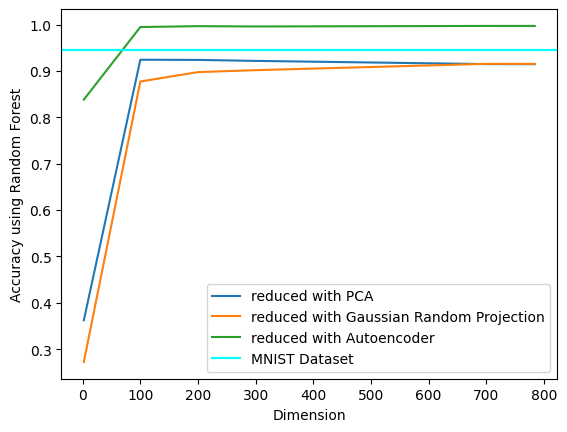

<Figure size 640x480 with 0 Axes>

In [26]:
acc_list_PCA = []
acc_list_RandomProjection = []
acc_list_Autoencoder = []
dim_list = []

dims = [2, 100, 200, 300, 700, 784]
for i in dims:
    # PCA projection on n components for training data
    pca = PCA(n_components=i)
    transformed_train_data_PCA = pca.fit_transform(train_mnist)
    transformed_test_data_PCA = pca.transform(test_mnist)

    grp = GaussianRandomProjection(n_components=i)
    transformed_train_data_randomProj = grp.fit_transform(train_mnist)
    transformed_test_data_randomProj = grp.transform(test_mnist)

    rf_PCA = RandomForestClassifier(n_estimators=266, max_depth=11)
    rf_PCA.fit(transformed_train_data_PCA, y_train)
    y_pred_PCA = rf_PCA.predict(transformed_test_data_PCA)

    rf_randomProj = RandomForestClassifier(n_estimators=266, max_depth=11)
    rf_randomProj.fit(transformed_train_data_randomProj, y_train)
    y_pred_randomProj = rf_randomProj.predict(transformed_test_data_randomProj)

    accscore_PCA = accuracy_score(y_test, y_pred_PCA, normalize=True)
    accscore_randomProj = accuracy_score(y_test, y_pred_randomProj, normalize=True)
    print(accscore_PCA)
    print(accscore_randomProj)
    acc_list_PCA.append(accscore_PCA)
    acc_list_RandomProjection.append(accscore_randomProj)
    dim_list.append(i)

print(*acc_list_PCA, sep=", acc: ")
print(*acc_list_RandomProjection, sep=", acc: ")
print(*dim_list, sep=", dim: ")

plt.plot(dim_list, acc_list_PCA, label='reduced with PCA')
plt.plot(dim_list, acc_list_RandomProjection, label='reduced with Gaussian Random Projection')
# The content of the list acc_list_Autoencoder was calculated in different Jupyter notebooks.
acc_list_Autoencoder = [0.8382, 0.9947, 0.9966, 0.9959, 0.9971, 0.9971]
plt.plot(dim_list, acc_list_Autoencoder, label='reduced with Autoencoder')

rf_MNIST = RandomForestClassifier(n_estimators=266, max_depth=11)
rf_MNIST.fit(train_mnist, y_train)

y_pred_MNIST = rf_MNIST.predict(test_mnist)

print(accuracy_score(y_test, y_pred_MNIST, normalize=True))

plt.axhline(accuracy_score(y_test, y_pred_MNIST, normalize=True), label ='MNIST Dataset', color='#00FFFF')
plt.xlabel("Dimension")
plt.ylabel("Accuracy using Random Forest")
plt.legend()

fig = plt.figure()
fig.savefig('temp.png')